<a href="https://colab.research.google.com/github/LauraGuio/MachineLearning/blob/master/DL_PARCIAL1_LSGC_GNF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BILL_AUTHENTICATION

**Parcial realizado por Guido Nahuel Franco y Laura Sofía Guío Camargo**

##Importar csv

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline
## Con ese link no es necesario descargar el dataset en google drive
column_names = ['variance', ' skewness', 'curtosis', 'entropy', 'class']
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt", header=None, names=column_names)
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


##Analizamos los datos

###¿Existen valores nulos?

In [ ]:
df.isnull().sum()

variance     0
 skewness    0
curtosis     0
entropy      0
class        0
dtype: int64

No existen valores nulos

###Descripción del dataset

In [ ]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


###Graficamos datos

####Matriz de correlación

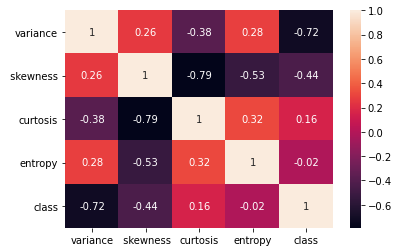

In [ ]:
correlation_matrix = df.corr().round(2)
sbn.heatmap(data=correlation_matrix,annot=True)

####Gráfica Billetes falsos VS Verdaderos

Text(0.5, 0, 'Falso o verdadero')

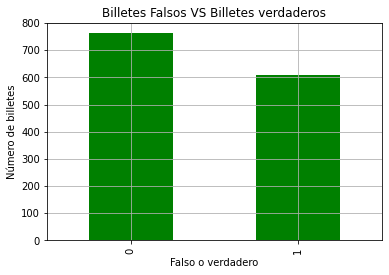

In [ ]:
bill = df.groupby(['class']).size()
bill.plot.bar(color='green').grid(True)
plt.ylabel("Número de billetes")
plt.title("Billetes Falsos VS Billetes verdaderos")
plt.xlabel("Falso o verdadero")

####Graficando todos los datos

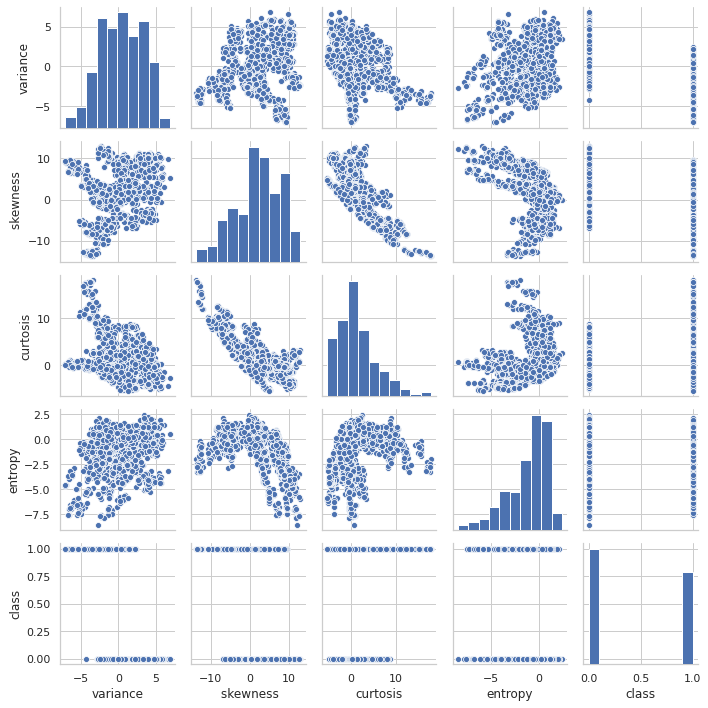

In [ ]:
sbn.set(style="whitegrid", context="notebook")
plot_data=df.columns
sbn.pairplot(df[plot_data],height=2.0)
plt.tight_layout()
plt.show()

## **Modelos de ML a utilizar**

Debido a que la variable a predecir, `class`, es discreta y sus únicos valores son 0 o 1, los modelos que se pueden utilizar son:
- Regresión logística
- Árbol de decisión de clasificación

### Librerías necesarias

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Separación de los datos en `train `y `test`

Decidimos separar el dataset de la siguiente forma:
- 80% de entrenamiento
- 20% de prueba

In [ ]:
X = df.iloc[:, :-1]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

## **Regresión logística**

### Entrenamiento

In [ ]:
# instanciamos el modelo
reg = LogisticRegression()

# entrenamiento del modelo
reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Resultados

A continuación, calculamos la precisión de este modelo

In [ ]:
# primero generamos las predicciones
y_pred = reg.predict(X_test)

## calculamos el accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Precisión: ', round(accuracy*100, 2), '%')

Precisión:  99.64 %


###Realizamos algunas predicciones

In [ ]:
billetes=np.array([[-5,10,15.9,-5.24],[5,11,-2.2,0.5],[-1.97250,2.88250,-2.30860,-2.37240],[-2.91380,-9.47110,9.76680,-0.60216]])
x_nuevo=pd.DataFrame(billetes, columns=['variance','skewness','curtosis','emtropy'])
y_prediccion=reg.predict(x_nuevo)
print(y_prediccion)

[0 0 1 1]


Los dos primeros valores agregados al array billetes fueron escritos al azar, mientras que los dos últimos son valores que se encuentran en el dataset original; estos deben clasificarse en la clase 1 según el dataset original y como podemos evidenciar, se predijeron correctamente.



## **Árbol de decisión**

Primero vamos a evaluar este modelo de `Decision Tree` con distintos valores para el parámetro max_depth.

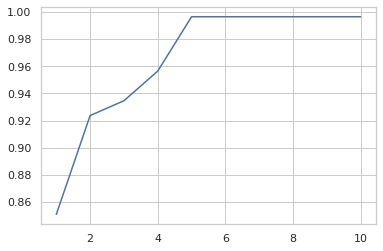

In [ ]:
from matplotlib import pyplot as plt

accuracy_list = []
depth_list = range(1, 11)
for depth in depth_list:
  clf = DecisionTreeClassifier(max_depth=depth)
  clf.fit(X_train, y_train)
  accuracy_list.append(clf.score(X_test, y_test))

plt.plot(depth_list, accuracy_list)
plt.grid(True)
plt.show()

De acuerdo a la gráfica, si la profundidad máxima del árbol es mayor o igual a 5, la precisión del algoritmo resulta igual a 1, lo que significa un 100% de overfitting.
Entonces elegimos una profunda máxima igual a 4.

### **Entrenamiento del modelo**

In [ ]:
# instanciamos el modelo
clf = DecisionTreeClassifier(max_depth=4)

# entrenamos el modelo
clf.fit(X_train, y_train)

# generamos las predicciones del modelo
y_pred = clf.predict(X_test)

Vemos cuanto es la precisión (`accuracy`) de este modelo

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del modelo: ', round(accuracy * 100, 2),'%')

Precisión del modelo:  95.64 %


### Gráfico del árbol

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

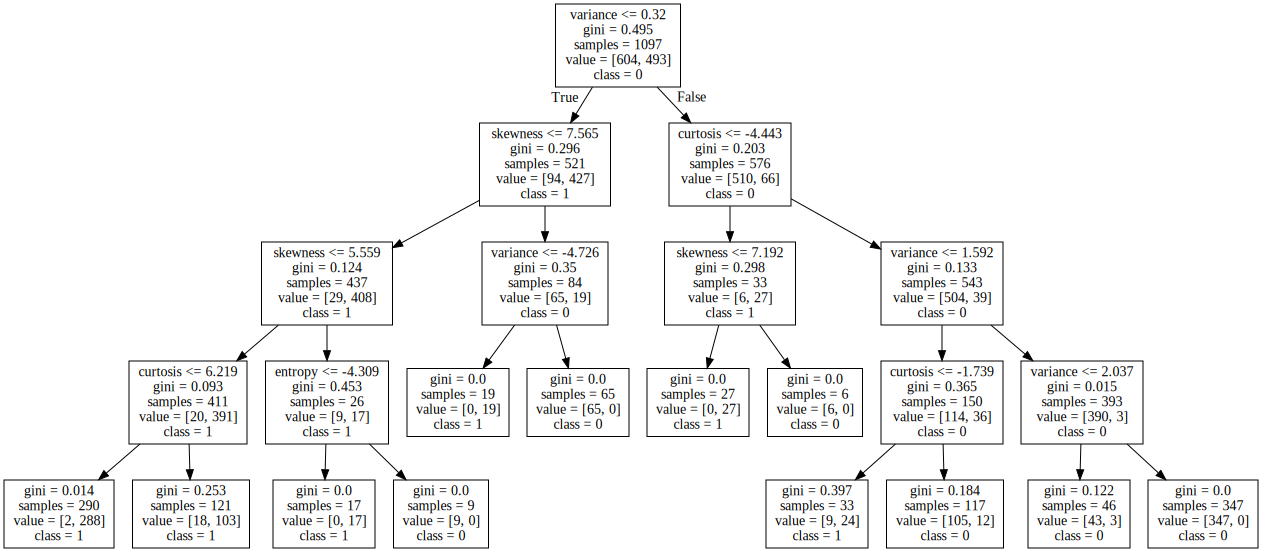

In [ ]:
export_graphviz(clf, out_file="tree.dot", class_names=["0", "1"],
                feature_names=X.columns)

with open("tree.dot") as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

##Conclusión

En conclusión, revisando las gráficas generadas y con la realización de los algoritmos, el que tiene una mejor precisión es el algoritmo de regresión logística.